# Felipe Castillo

Week 11 HomeWork Assignment

http://thinkstats2.com




In [10]:
from __future__ import print_function, division

%matplotlib inline

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import os

import random

os.chdir(r'C:\ExplorartoryDataAnalysis_DSC_530\ThinkStats2\code')


import thinkstats2
import thinkplot

## Survival analysis

If we have an unbiased sample of complete lifetimes, we can compute the survival function from the CDF and the hazard function from the survival function.

Here's the distribution of pregnancy length in the NSFG dataset.

In [25]:
def ResampleSurvival(resp, iters=101):
    """Resamples respondents and estimates the survival function.

    resp: DataFrame of respondents
    iters: number of resamples
    """ 
    _, sf = EstimateMarriageSurvival(resp)
    thinkplot.Plot(sf)

    low, high = resp.agemarry.min(), resp.agemarry.max()
    ts = np.arange(low, high, 1/12.0)

    ss_seq = []
    for _ in range(iters):
        sample = thinkstats2.ResampleRowsWeighted(resp)
        _, sf = EstimateMarriageSurvival(sample)
        ss_seq.append(sf.Probs(ts))

    low, high = thinkstats2.PercentileRows(ss_seq, [5, 95])
    thinkplot.FillBetween(ts, low, high, color='gray', label='90% CI')

The following plot shows the survival function based on the raw data and a 90% CI based on resampling.

## Exercises

**Exercise:**    In NSFG Cycles 6 and 7, the variable `cmdivorcx` contains the date of divorce for the respondent’s first marriage, if applicable, encoded in century-months.

Compute the duration of marriages that have ended in divorce, and the duration, so far, of marriages that are ongoing. Estimate the hazard and survival curve for the duration of marriage.

Use resampling to take into account sampling weights, and plot data from several resamples to visualize sampling error.

Consider dividing the respondents into groups by decade of birth, and possibly by age at first marriage.

In [37]:
def CleanData(resp):
    """Cleans respondent data.

    resp: DataFrame
    """
    resp.cmdivorcx.replace([9998, 9999], np.nan, inplace=True)

    resp['notdivorced'] = resp.cmdivorcx.isnull().astype(int)
    resp['duration'] = (resp.cmdivorcx - resp.cmmarrhx) / 12.0
    resp['durationsofar'] = (resp.cmintvw - resp.cmmarrhx) / 12.0

    month0 = pd.to_datetime('1899-12-15')
    dates = [month0 + pd.DateOffset(months=cm) 
             for cm in resp.cmbirth]
    resp['decade'] = (pd.DatetimeIndex(dates).year - 1900) // 10

In [346]:
CleanData(resp6)
married6 = resp6[resp6.evrmarry==1].dropna()

CleanData(resp7)
married7 = resp7[resp7.evrmarry==1].dropna()



In [164]:
# Solution goes here1

resp6 = survival.ReadFemResp2002()
resp7 = survival.ReadFemResp2010().dropna()

In [231]:

married6.head()
#resp6

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,parity,finalwgt,cmintvw,agemarry,age,year,decade,fives,notdivorced,duration,durationsofar
1,5012,718,True,974.0,1077.0,1,4744.191350,1233,21.333333,42.916667,59,5,11,0,8.583333,21.583333
2,11586,708,True,910.0,938.0,1,4744.191350,1234,16.833333,43.833333,58,5,11,0,2.333333,27.000000
13,11700,822,True,1015.0,1051.0,2,4666.559600,1236,16.083333,34.500000,68,6,13,0,3.000000,18.416667
14,7354,896,True,1071.0,1178.0,5,3026.730179,1235,14.583333,28.250000,74,7,14,0,8.916667,13.666667
27,5083,789,True,1064.0,1168.0,2,3374.535218,1236,22.916667,37.250000,65,6,13,0,8.666667,14.333333


In [299]:
# Solution goes here

CleanData(resp6)


marriedResp6 = resp6[resp6.evrmarry].dropna()

resp6

,caseid,cmbirth,evrmarry,cmmarrhx,cmdivorcx,parity,finalwgt,cmintvw,agemarry,age,year,decade,fives,notdivorced,duration,durationsofar
0,2298,902,False,NaN,NaN,4,5556.717241,1234,NaN,27.666667,75,7,15,1,NaN,NaN
1,5012,718,True,974.0,1077.0,1,4744.191350,1233,21.333333,42.916667,59,5,11,0,8.583333,21.583333
2,11586,708,True,910.0,938.0,1,4744.191350,1234,16.833333,43.833333,58,5,11,0,2.333333,27.000000
3,6794,1042,False,NaN,NaN,0,5923.977368,1234,NaN,16.000000,86,8,17,1,NaN,NaN
4,616,991,False,NaN,NaN,0,7229.128072,1233,NaN,20.166667,82,8,16,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7638,11018,811,True,1032.0,1053.0,0,6565.818007,1228,18.416667,34.750000,67,6,13,0,1.750000,16.333333
7639,6075,1014,False,NaN,NaN,0,4392.385746,1228,NaN,17.833333,84,8,16,1,NaN,NaN
7640,5649,873,False,NaN,NaN,0,6003.228729,1228,NaN,29.583333,72,7,14,1,NaN,NaN
7641,501,1034,False,NaN,NaN,0,10473.623950,1228,NaN,16.166667,86,8,17,1,NaN,NaN


In [273]:
# Solution goes here

CleanData(resp7)
marriedResp7 = resp7[resp7.evrmarry].dropna()




In [169]:
!pip install lifelines

In [170]:
# Solution goes here

import lifelines
from lifelines import KaplanMeierFitter

In [329]:
complete6 = marriedResp6[marriedResp6.notdivorced == 0].duration
ongoing6 = marriedResp6[marriedResp6.notdivorced == 1].durationsofar


#DECongoing6 = marriedResp6[marriedResp6.notdivorced == 1].decade
DivTimeFrame = marriedResp6[marriedResp6.notdivorced == 0].decade


In [330]:


complete7 = marriedResp7[marriedResp7.notdivorced == 0].duration

ongoing7 = resp6[resp6.notdivorced == 0].durationsofar

DivTimeFrame2 = marriedResp7[marriedResp7.notdivorced == 0].decade

In [173]:
kfm = KaplanMeierFitter() 

In [334]:


kfm.fit(DivTimeFrame, complete6, label='completed 6')


<lifelines.KaplanMeierFitter:"completed 6", fitted with 977 total observations, 55 right-censored observations>

<AxesSubplot:xlabel='timeline'>

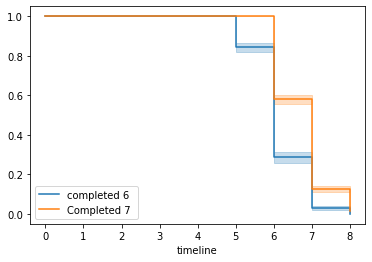

In [335]:
 plot1 = kfm.plot()


kfm.fit(DivTimeFrame2,complete7 , label ="Completed 7 ")
kfm.plot(ax= plot1)

# Hazard Function

In [336]:
from lifelines import NelsonAalenFitter

In [338]:
naf_m = NelsonAalenFitter()
naf_f = NelsonAalenFitter()

In [340]:
naf_m.fit(DivTimeFrame,complete6)
naf_f.fit(DivTimeFrame2,complete7)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 1551 total observations, 73 right-censored observations>

<AxesSubplot:xlabel='timeline'>

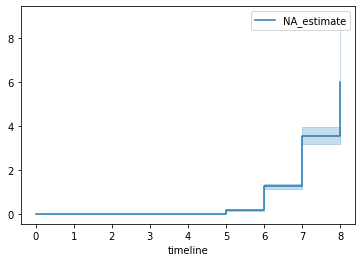

In [342]:
naf_m.plot_cumulative_hazard()

<AxesSubplot:xlabel='timeline'>

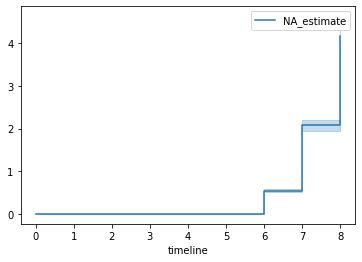

In [344]:
naf_f.plot_cumulative_hazard()